<a href="https://colab.research.google.com/github/Yash-Yelave/AI_and_ML_Workshop-6-8-2025-/blob/main/ECGEfficientNet_ML_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set dataset path
dataset_path = "/content/drive/MyDrive/Engineering/Sem5/ML_workshop"  # Change this to your dataset path
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")

In [4]:
# Image size and batch size
img_size = (224, 224)
batch_size = 32

In [5]:
# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

In [6]:
train_generator = datagen.flow_from_directory(
    train_dir, # Use train_dir instead of dataset_path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    val_dir, # Use val_dir instead of dataset_path
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 96 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
# Load EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Customizing Model
global_avg_pool = GlobalAveragePooling2D()(base_model.output)
dropout = Dropout(0.5)(global_avg_pool)
output = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=base_model.input, outputs=output)

In [9]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the Model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 11s/step - accuracy: 0.5065 - loss: 0.7032 - val_accuracy: 0.6000 - val_loss: 0.6924
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5820 - loss: 0.6723 - val_accuracy: 0.6000 - val_loss: 0.6787
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.3841 - loss: 0.7133 - val_accuracy: 0.6000 - val_loss: 0.6812
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5208 - loss: 0.7144 - val_accuracy: 0.6000 - val_loss: 0.6869
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.4323 - loss: 0.7127 - val_accuracy: 0.6000 - val_loss: 0.6904
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4909 - loss: 0.7082 - val_accuracy: 0.4000 - val_loss: 0.6942
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4674 - loss: 0.7186 - val_accuracy: 0.4000 - val_loss: 0.6973
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4518 - loss: 0.7266 - val_accuracy: 0.4000 - val_loss: 0.6964
Epoch 9/

In [11]:
# Evaluate the Model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.6926
Validation Accuracy: 60.00%


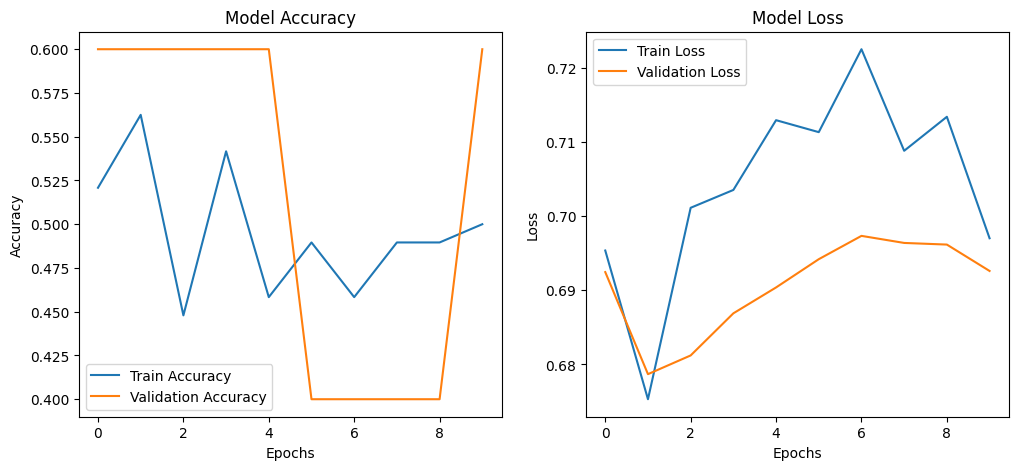

In [12]:
# Plot Performance Metrics
def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_metrics(history)